In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data=pd.read_csv('Housing.csv')

In [4]:
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


## DATA PREPROCOSSING

In [6]:
data['mainroad']=data['mainroad'].map({'yes':1,'no':0})
data['guestroom']=data['guestroom'].map({'yes':1,'no':0})
data['basement']=data['basement'].map({'yes':1,'no':0})
data['hotwaterheating']=data['hotwaterheating'].map({'yes':1,'no':0})
data['airconditioning']=data['airconditioning'].map({'yes':1,'no':0})
data['prefarea']=data['prefarea'].map({'yes':1,'no':0})

In [7]:
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


In [8]:
data.tail()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,unfurnished
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,semi-furnished
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,unfurnished
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,furnished
544,1750000,3850,3,1,2,1,0,0,0,0,0,0,unfurnished


Furnishingstatus'te 3 farklı stn tipi var bunları da int olarak çevirmemiz gerekiyor

In [9]:
status=pd.get_dummies(data['furnishingstatus'])

In [10]:
status.head()

,furnished,semi-furnished,unfurnished
0,1,0,0
1,1,0,0
2,0,1,0
3,1,0,0
4,1,0,0


In [11]:
status=pd.get_dummies(data['furnishingstatus'],drop_first=True)

In [12]:
status
## furnished kolonunu attık. 2 kolona getirdik.

,semi-furnished,unfurnished
0,0,0
1,0,0
2,1,0
3,0,0
4,0,0
...,...,...
540,0,1
541,1,0
542,0,1
543,0,0


In [13]:
## Ortaya çıkan 2li satırları veri setine ekleyeceğiz.
data=pd.concat([data,status],axis=1)

In [14]:
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished,0,0


In [15]:
##furnishing status kolonunu silmemiz gerekiyor.
data.drop(['furnishingstatus'],axis=1,inplace=True)

In [16]:
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0,0


In [17]:
## Bu int değerleri elde etmemizin sebebi lineer regresyonun sayısal işlemlerle yapılıyor olması !!

Creating New Variable

In [18]:
## Regresyon modelini zenginleştirmek için iki tane term interaction ekledik
data['areaperbedroom']=data['area']/data['bedrooms']
data['bbratio']=data['bathrooms']/data['bedrooms']

In [19]:
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished,areaperbedroom,bbratio
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0,0,1855.0,0.500000
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0,0,2240.0,1.000000
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1,0,3320.0,0.666667
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0,0,1875.0,0.500000
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0,0,1855.0,0.250000


## Normalizasyon İşlemi

Area ve diğer kolonlar arasında çok büyük farklılıklar mevcut. Bu durumda işlem yapmak çok doğru değil. Normalizasyon işlemi yapmamız gerekiyor. Bunun için 2 farklı normalizasyon yapabiliriz.

1-Normalizasyon(Min-max scaling)
2-Standardizasyon (mean-sigma-1)

In [20]:
def normalize(x):
    return ((x-np.min(x))/ (max(x)-min(x)))
## Normalizasyonu tüm kolonlara uygulamak için;
data=data.apply(normalize)

## Veriyi Train ve Test olarak Ayırmak 

In [21]:
data.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'semi-furnished', 'unfurnished',
       'areaperbedroom', 'bbratio'],
      dtype='object')

In [22]:
## Bağımsız değişkenleri X olarak atayalım
X=data[['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'semi-furnished', 'unfurnished',
       'areaperbedroom', 'bbratio']]
## Bağımlı Değişkeni Y olarak atayalım.
Y=data['price']

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train,y_test=train_test_split(X,Y,train_size=0.7, test_size=0.3,random_state=100)

Lineer Regression Modeli Oluşturmak

In [24]:
import statsmodels.api as sm        ##statsmodelim importu
X_train=sm.add_constant(X_train)    ## Regresyondaki sabit katsayıyı Train setine ekledik.
## Fit olmuş ilk modelin oluşturulması
lm_1=sm.OLS(Y_train,X_train).fit()

In [25]:
print(lm_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.686
Model:                            OLS   Adj. R-squared:                  0.673
Method:                 Least Squares   F-statistic:                     53.12
Date:                Mon, 22 Feb 2021   Prob (F-statistic):           4.56e-82
Time:                        15:19:46   Log-Likelihood:                 384.40
No. Observations:                 381   AIC:                            -736.8
Df Residuals:                     365   BIC:                            -673.7
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0603      0.059     

## VIF DEĞERİNİN KONTROLÜ

In [26]:
# VIF(Variance inflation factor) bir bağımsız değişkenin diğer bağımsız değişkenlere bağımlılığını ölçer
# Büyük değere sahip olan bağımsız değişken modelden atılır.
# 1 / 1- Rsquare formülüyle hesaplanır.
# Her modelden atılan değişken için Rsquare hesaplanır.

def vif_cal(input_data,dependent_col):
    vif_df=pd.DataFrame(columns=['Var','Vif'])
    x_vars=input_data.drop([dependent_col],axis=1)
    xvar_names=x_vars.columns
    for i in range(0,xvar_names.shape[0]):
        y=x_vars[xvar_names[i]]
        x=x_vars[xvar_names.drop(xvar_names[i])]
        rsq=sm.OLS(y,x).fit().rsquared
        vif=round(1/(1-rsq),2)
        vif_df.loc[i]=[xvar_names[i],vif]
    return vif_df.sort_values(by= 'Vif',axis=0,ascending=False,inplace=False)

In [27]:
vif_cal(input_data=data,dependent_col="price")

,Var,Vif
13,areaperbedroom,68.71
0,area,57.52
14,bbratio,29.25
2,bathrooms,11.11
1,bedrooms,10.68
4,mainroad,7.91
3,stories,2.81
11,semi-furnished,2.61
12,unfurnished,2.38
6,basement,2.05


## CORELATION MATRIX

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<AxesSubplot:>

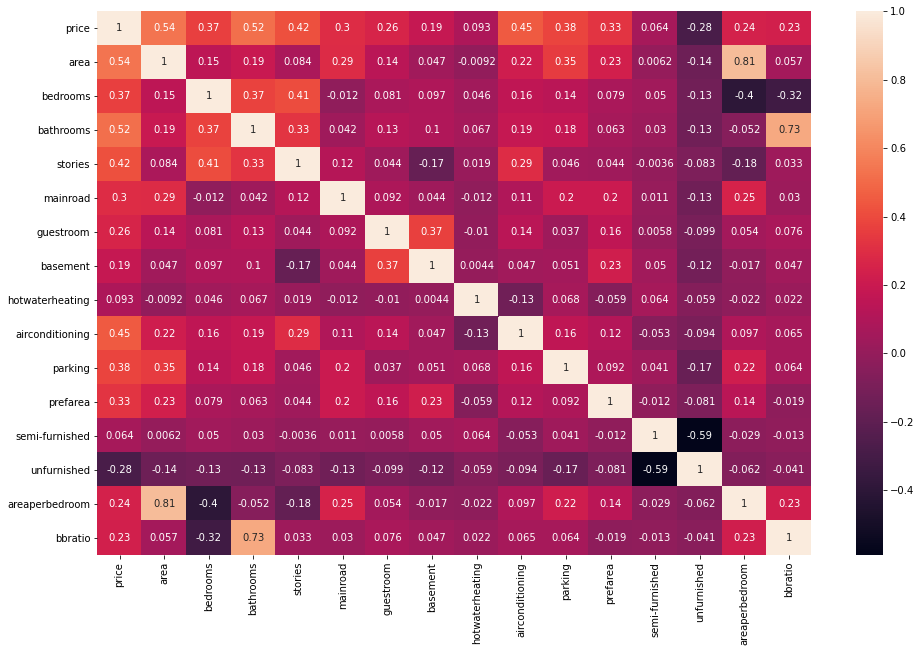

In [29]:
## Create of the Correlation Matrix
plt.figure(figsize=(16,10))
sns.heatmap(data.corr(),annot= True)

## Özellik Çıkarımı ve Modelin Update Edilmesi

In [30]:
X_train=X_train.drop('bbratio',1)

In [31]:
lm_2=sm.OLS(Y_train,X_train).fit()

In [32]:
print(lm_2.summary()) ## RSQUARED BAKMALISIN

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.686
Model:                            OLS   Adj. R-squared:                  0.674
Method:                 Least Squares   F-statistic:                     57.03
Date:                Mon, 22 Feb 2021   Prob (F-statistic):           6.46e-83
Time:                        15:19:52   Log-Likelihood:                 384.31
No. Observations:                 381   AIC:                            -738.6
Df Residuals:                     366   BIC:                            -679.5
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0799      0.036     

In [33]:
vif_cal(input_data=data.drop(["bbratio"], axis=1),dependent_col="price")

,Var,Vif
0,area,20.72
13,areaperbedroom,18.44
1,bedrooms,10.03
4,mainroad,7.46
3,stories,2.78
11,semi-furnished,2.48
12,unfurnished,2.20
6,basement,2.03
9,parking,2.00
8,airconditioning,1.77


In [34]:
X_train=X_train.drop('bedrooms',1)

In [35]:
lm_3=sm.OLS(Y_train,X_train).fit()

In [36]:
print(lm_3.summary()) ## RSQUARED BAKMALISIN

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.684
Model:                            OLS   Adj. R-squared:                  0.673
Method:                 Least Squares   F-statistic:                     61.23
Date:                Mon, 22 Feb 2021   Prob (F-statistic):           1.66e-83
Time:                        15:19:54   Log-Likelihood:                 383.55
No. Observations:                 381   AIC:                            -739.1
Df Residuals:                     367   BIC:                            -683.9
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0427      0.018     

In [37]:
vif_cal(input_data=data.drop(["bedrooms","bbratio"], axis=1),dependent_col="price")

,Var,Vif
0,area,14.98
12,areaperbedroom,13.88
3,mainroad,6.10
2,stories,2.56
10,semi-furnished,2.04
8,parking,2.00
5,basement,1.90
7,airconditioning,1.76
11,unfurnished,1.72
1,bathrooms,1.69


In [38]:
X_train=X_train.drop('areaperbedroom',1)

In [39]:
lm_4=sm.OLS(Y_train,X_train).fit()

In [40]:
print(lm_4.summary()) ## RSQUARED BAKMALISIN

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.680
Model:                            OLS   Adj. R-squared:                  0.670
Method:                 Least Squares   F-statistic:                     65.20
Date:                Mon, 22 Feb 2021   Prob (F-statistic):           2.35e-83
Time:                        15:20:23   Log-Likelihood:                 380.96
No. Observations:                 381   AIC:                            -735.9
Df Residuals:                     368   BIC:                            -684.7
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0313      0.017     

In [42]:
vif_cal(input_data=data.drop(["bedrooms","bbratio","areaperbedroom"], axis=1),dependent_col="price")

,Var,Vif
3,mainroad,5.51
0,area,4.43
2,stories,2.32
10,semi-furnished,2.00
8,parking,1.99
5,basement,1.90
7,airconditioning,1.76
11,unfurnished,1.65
1,bathrooms,1.62
9,prefarea,1.50


In [43]:
X_train=X_train.drop('mainroad',1)

In [44]:
lm_5=sm.OLS(Y_train,X_train).fit()

In [45]:
print(lm_5.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.670
Model:                            OLS   Adj. R-squared:                  0.660
Method:                 Least Squares   F-statistic:                     68.09
Date:                Mon, 22 Feb 2021   Prob (F-statistic):           8.13e-82
Time:                        15:21:25   Log-Likelihood:                 375.00
No. Observations:                 381   AIC:                            -726.0
Df Residuals:                     369   BIC:                            -678.7
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0642      0.015     

In [46]:
vif_cal(input_data=data.drop(["bedrooms","bbratio","areaperbedroom","mainroad"], axis=1),dependent_col="price")

,Var,Vif
0,area,3.60
2,stories,2.15
7,parking,1.94
4,basement,1.84
6,airconditioning,1.76
9,semi-furnished,1.76
1,bathrooms,1.61
8,prefarea,1.48
3,guestroom,1.47
10,unfurnished,1.43


## SON MODEL İÇİN TAHMİN YAPMAK

In [47]:
X_test_m6=sm.add_constant(X_test)  ## Test setine sabit terimi içeren kolonun eklenmesi

In [48]:
X_test_m6=X_test_m6.drop(["bedrooms","bbratio","areaperbedroom","mainroad"],axis=1)  ## Test setinden trainde çıkarılan terimleri düşürmek

In [60]:
Y_pred_m6=lm_5.predict(X_test_m6) ##tahminin yapılması

Model Evaluation

Text(0, 0.5, 'Ev Fiyatı')

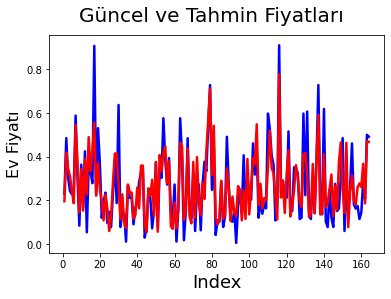

In [63]:
c=[i for i in range(1,165,1)]
fig=plt.figure()
plt.plot(c,y_test,color="blue",linewidth=2.5,linestyle="-") ## Güncel değerler
plt.plot(c,Y_pred_m6,color="red",linewidth=2.5,linestyle="-") ## Tahminin grafiği
fig.suptitle('Güncel ve Tahmin Fiyatları',fontsize=20)
plt.xlabel('Index',fontsize=18)
plt.ylabel('Ev Fiyatı',fontsize =16)

# Güncel ve Tahminlerin Dağılım Grafiklerini Görmek

 Dağılım Grafikleri için scatter plot kullanırız

Text(0, 0.5, 'Y_pred')

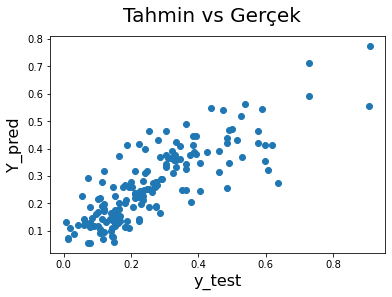

In [64]:
fig=plt.figure()
plt.scatter(y_test,Y_pred_m6)
fig.suptitle('Tahmin vs Gerçek',fontsize=20)
plt.xlabel('y_test',fontsize=16)
plt.ylabel('Y_pred',fontsize=16)

## Hata Terimlerinin ekrana bastırılması

Text(0, 0.5, 'ytest-ypred')

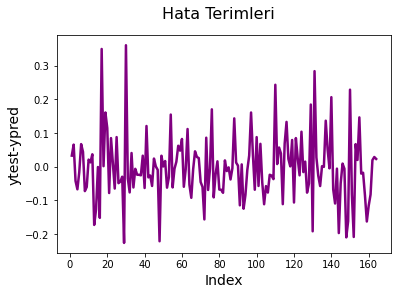

In [71]:
fig=plt.figure()
c=[i for i in range (1,165,1)]
plt.plot(c,y_test-Y_pred_m6,color="purple",linewidth=2.5)
fig.suptitle('Hata Terimleri',fontsize=16)
plt.xlabel('Index',fontsize=14)
plt.ylabel('ytest-ypred',fontsize=14)
## 0'a yakın değerler kusursuz demek

Hata terimlerinin dağılımına bakacağız.

C:\Users\MUSTAFA\anaconda3\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Index')

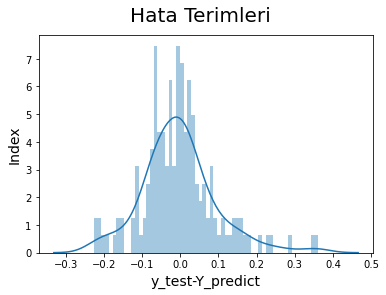

In [72]:
fig=plt.figure()
sns.distplot((y_test-Y_pred_m6),bins=60)
fig.suptitle('Hata Terimleri',fontsize=20)
plt.xlabel('y_test-Y_predict',fontsize =14)
plt.ylabel('Index',fontsize=14)

Dağılım normal dağılım grafiğine benziyor. Yaptığımız tahminleme kabul edilebilir bir tahminlemedir.

# Test Hatasını Ölçelim

In [73]:
from sklearn import metrics

In [74]:
print('RMSE :',np.sqrt(metrics.mean_squared_error(y_test,Y_pred_m6)))

RMSE : 0.09714405985840732
